<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%B0%95%EB%B4%89%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장

In [8]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
# 1) 한글 폰트 설치
# 2) 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
# 3) 한글 폰트 읽어오기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

In [3]:
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###문제3
- '7장_연습1.xlsx' 읽어와 각 속성의 결측치 확인하는 빈칸 작성

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('7장_연습1.xlsx')
df.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

###문제4
- '7장_연습1.xlsx' 읽어와 나이('age')에 따른 value 산점도 확인 후 이상치 제거하는 빈칸 작성

<function matplotlib.pyplot.show(close=None, block=None)>

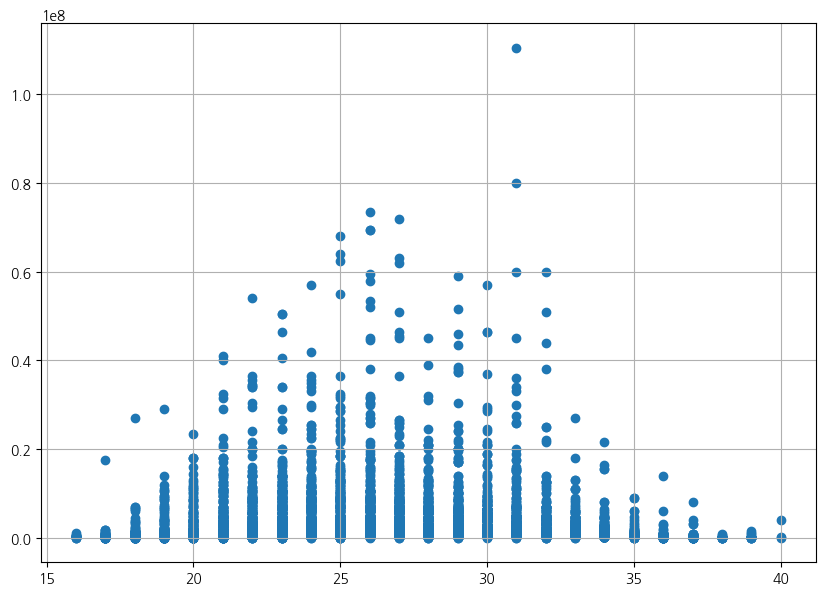

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('7장_연습1.xlsx')
plt.figure(figsize=(10,7))
plt.scatter(x = df['age'], y = df['value'])
plt.grid()
plt.show

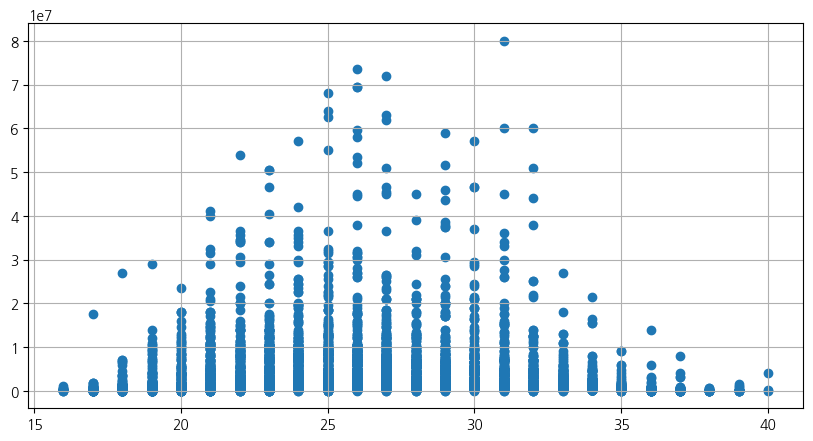

In [41]:
num_features = df.select_dtypes(include=[np.number]).columns
df = df.drop(df[df['value'] > 100000000].index)
plt.figure(figsize=(10, 5))
plt.scatter(x=df['age'], y=df['value'])
plt.grid()
plt.show()

###문제5
- '7장_연습문제2.csv'의 타이타닉호 탑승자 정보를 이용하여 다음의 조건을 차례대로 수행하는 빈칸 작성

 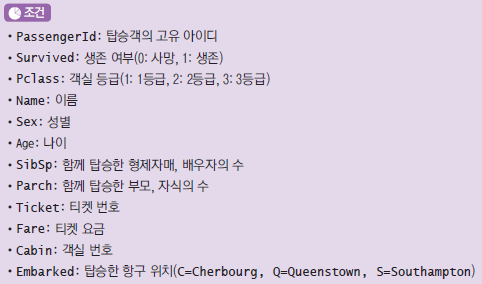

#### 1) 데이터 결측값 확인하는 빈칸 작성

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('7장_연습문제2.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2) Age 결측값을 평균값으로 대체하는 빈칸 작성

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3) 객실등급(pclass)별 생존율의 평균을 시각화하는 빈칸 작성

In [21]:
df['Pclass'].value_counts().index

Int64Index([3, 1, 2], dtype='int64')

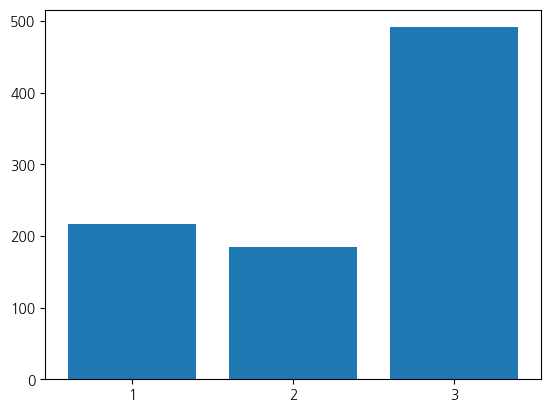

In [22]:
plt.bar(x=df.Pclass.value_counts().index, height=df.Pclass.value_counts())
plt.xticks(range(1, 4))
plt.show()

#### 4) 성별에 따른 생존율을 시각화하는 빈칸 작성

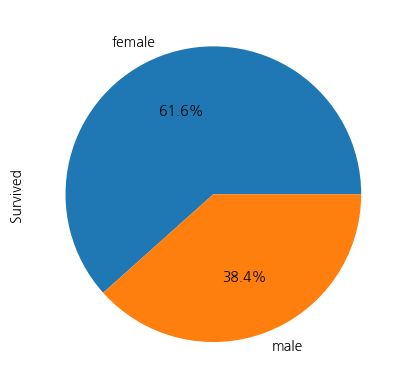

In [28]:
value_counts = df['Survived'].value_counts()
plt.pie(value_counts, labels=['female', 'male'], autopct='%.1f%%' )
plt.ylabel('Survived')
plt.show()

#### 5) 승객 연령대별 분포를 시각화하는 빈칸 작성

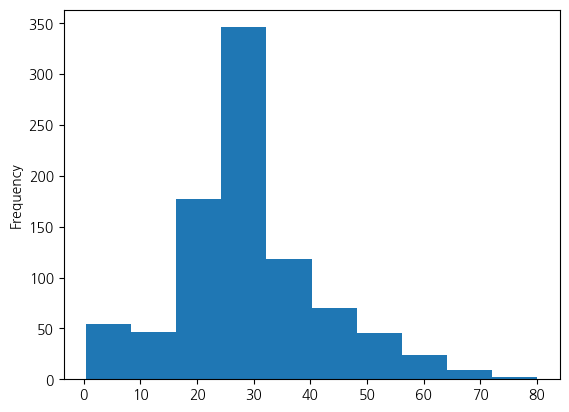

In [29]:
plt.hist(df.Age)
plt.ylabel('Frequency')
plt.show()

#### 6) 연령대별 생존율을 시각화하는 빈칸 작성

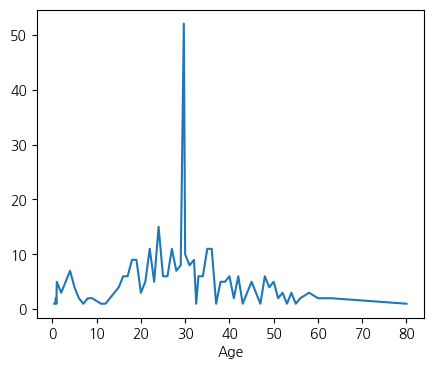

In [38]:
survived_age_counts = df['Age'][df['Survived']==1].value_counts().sort_index()
plt.figure(figsize=(5, 4))
plt.plot(survived_age_counts.index, survived_age_counts.values)
plt.xlabel('Age')
plt.show()

#### 7) 각 속성을 상관관계로 시각화하는 빈칸 작성

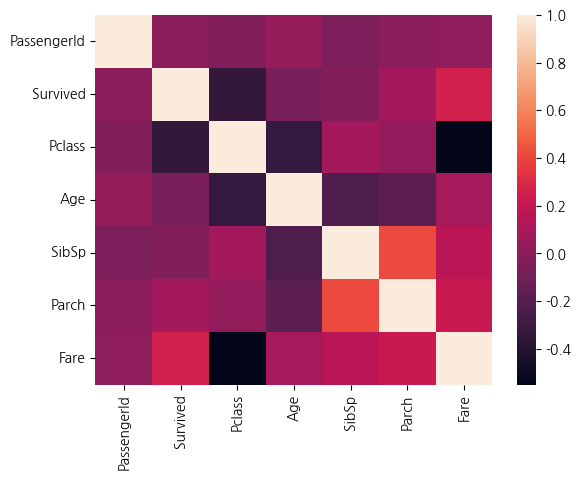

In [31]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)
plt.show()